In [4]:
import warnings
warnings.filterwarnings('ignore')

# Dimensionality Reduction

The two common dimensionality reduction algorithms include principle component analysis 
and factor analysis. 

These algorithms takes input of a high dimensional representation of the data, which  
consists of many features and produces a output  that summarizes the data by grouping  
essential characteristics and results into fewer factors. 


## Factor Analysis

Factor Analysis (FA) is an exploratory data analysis method used to search important 
underlying factors or latent variables from a set of observed variables. It helps in 
data interpretations by reducing the number of variables. 
    
It is widely utilized in nearly all the specialization where we need to reduce the number 
of existing features like market research, advertising, finance etc. 
    
Factor analysis is a linear statistical model. It is used to explain the variance among 
the observed variable and reduce a set of the observed variable into the unobserved 
variable called factors. 


In [5]:
#Importing the data set.
from sklearn.datasets import load_diabetes 
diabetes=load_diabetes ()
#Displaying the details of the data set.
print ("The description of the data set is: \n", diabetes.DESCR) 
x=diabetes.data
y=diabetes.target
print ("Dimension of independent variables:",x.shape)
#Applying Bartlett's test of sphericity for determining adequacy. 
#Importing necessary libraries.
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity 
chisquare,p_value=calculate_bartlett_sphericity(x)
print ("Chi Square value of Bartlett test: ", chisquare.round(3)) 
print ("p value of Bartlett test: ",p_value.round(3))
#Applying KMO test for determining adequacy.
from factor_analyzer.factor_analyzer import calculate_kmo 
kmo_values, kmo_model=calculate_kmo(x)
print ("KMO model: ", kmo_model.round(3))
print ("KMO values: \n",kmo_values.round(3))


The description of the data set is: 
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each 

## Principal Component Analysis

PCA is used to overcome features redundancy in a data set. These features are low 
dimensional in nature. These components aim to capture as much information as possible 
with high explained variance. 
    
The first component has the highest variance followed by second, third and so on. The 
components must be uncorrelated. 


Original shape of Friedman data set:  (100, 10)
Reduced shape of Friedman data set:  (100, 4)
Shape of Principal components: (4, 10)
Details of Principal components: 
 [[ 0.36   0.142 -0.148  0.186 -0.361  0.528  0.236 -0.285  0.488  0.103]
 [-0.447 -0.214  0.118  0.615 -0.047  0.17  -0.176  0.214  0.079  0.497]
 [ 0.211  0.214  0.429 -0.087 -0.421 -0.358 -0.117 -0.32  -0.214  0.5  ]
 [ 0.147  0.654 -0.339  0.431 -0.002 -0.025  0.073  0.219 -0.442 -0.028]]
Component-wise explained variance: 
 [0.153 0.137 0.129 0.104]


([<matplotlib.axis.XTick at 0x2539cb33dd0>,
 [Text(0, 1, '0'),
  Text(1, 1, '1'),
  Text(2, 1, '2'),
  Text(3, 1, '3'),
  Text(4, 1, '4'),
  Text(5, 1, '5'),
  Text(6, 1, '6'),
  Text(7, 1, '7'),
  Text(8, 1, '8'),
  Text(9, 1, '9')])

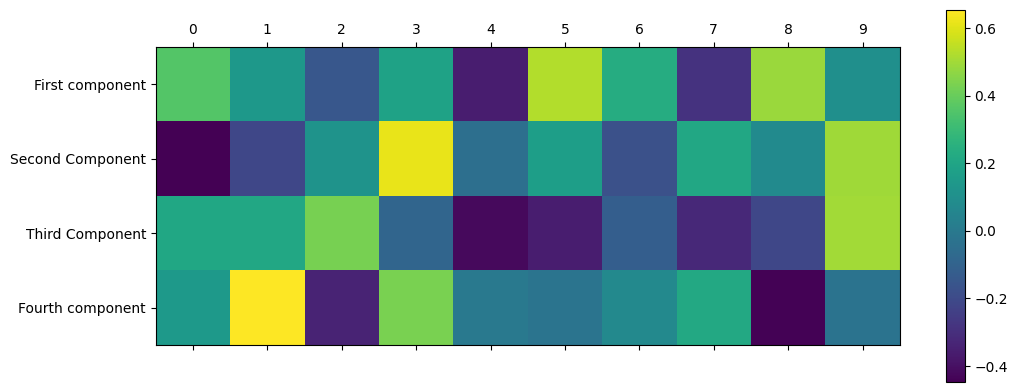

In [8]:
#Principal component analysis.
#Importing necessary libraries and loading data. 
from sklearn.decomposition import PCA
from sklearn.datasets import make_friedman1
x, y=make_friedman1()
#Performing principle component analysis. 
pca = PCA(n_components=4)
pca.fit(x)
x_transformed=pca.transform(x)
print ("Original shape of Friedman data set: ",x.shape)
print ("Reduced shape of Friedman data set: ",x_transformed.shape)
print("Shape of Principal components:",pca.components_.shape)
print ("Details of Principal components: \n",pca.components_.round(3))
print ("Component-wise explained variance: \n", pca.explained_variance_ratio_.round(3))
#Creating the chart for depicting components.
import matplotlib.pyplot as plt
plt.matshow(pca.components_)
plt.yticks(range (4), 
           ["First component", "Second Component", "Third Component", "Fourth component"])
plt.colorbar()
plt.xticks(range (10))


# Clustering

Clustering is the process of organizing objects into groups whose members are similar in 
some manner; it deals with finding a structure in a collection of unlabeled data. 

A cluster is a collection of objects that have similar characteristics between them and 
are dissimilar to the objects belonging to other clusters. 

Thus, data points inside a cluster are homogeneous and heterogeneous to other groups. 

The right number of clusters is an important issue because beyond which it becomes noise,
below which you are not capturing any observation. 
    
There are two forms of clustering: k-means and hierarchical clustering


## K-Means Clustering 

K-means picks k number of points for each cluster known as centroids. Each data point
forms a cluster with the closest centroids i.e. k clusters. Finds the centroid of each 
cluster based on existing cluster members. Here we have new centroids. As we have new 
centroids, repeat step 2 and 3. Find the closest distance for each data point from new 
centroids and get associated with new k-clusters. Repeat this process until convergence 
occurs i.e. centroids does not change. 


In [9]:
import seaborn as sns

In [25]:
import pandas

In [10]:
iris=sns.load_dataset('iris')

In [11]:
X=iris.drop('species',axis=1)

In [12]:
y=iris['species']

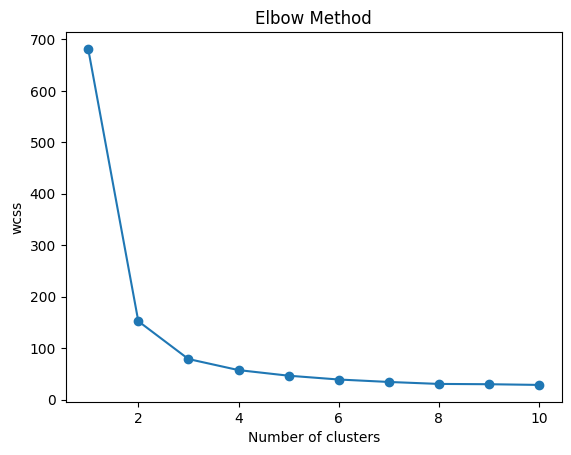

The predicted clusters are:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
The centers are: 
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Details of the predicted cluster are: 
 Predicted
2    61
1    50
0    39
Name: count, dtype: int64
The confusion matrix is: 
 [[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0 50  0  0  0  0]
 [ 3  0 47  0  0  0]
 [36  0 14  0  0  0]]


In [29]:
from sklearn.cluster import KMeans
list1=[]
for i in range (1,11):
    kmeans=KMeans (n_clusters=i, random_state=42) 
    kmeans.fit(X)
    #inertia= WCSS (within cluster sum of squares) 
    list1.append(kmeans.inertia_)
#Creating the scree plot.
plt.plot(range (1,11), list1, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
#Fitting K-means algorithm to data set with optimum number of clusters. 
kmeans=KMeans (n_clusters=3, random_state=10)
y_kmeans=kmeans.fit_predict(X)
print ("The predicted clusters are:\n", y_kmeans)
print ("The centers are: \n", kmeans.cluster_centers_)
#Determining number of observations in the cluster. import pandas
data={'Original': y, 'Predicted': y_kmeans}
kmeansdf = pandas.DataFrame (data, columns=['Original', 'Predicted'])
print ("Details of the predicted cluster are: \n", kmeansdf ["Predicted"].value_counts())
#Creating names of the clusters.
kmeansdf ['Original'].replace (to_replace=int ("0"), value="Setosa", inplace=True) 
kmeansdf ['Original'].replace (to_replace=int("1"), value="Versicolor", inplace=True) 
kmeansdf ['Original'].replace (to_replace=int("2"), value="Virginaca", inplace=True) 
kmeansdf['Predicted'].replace (to_replace=int ("0"), value="Setosa", inplace=True) 
kmeansdf ['Predicted'].replace (to_replace=int ("1"), value="Versicolor", inplace=True) 
kmeansdf ['Predicted'].replace (to_replace=int("2"), value="Virginaca", inplace=True)
#Creating confusion matrix of the model.
from sklearn.metrics import confusion_matrix
results=confusion_matrix (kmeansdf ['Original'], kmeansdf ['Predicted'])
print ("The confusion matrix is: \n", results)


In [32]:
kmeansdf.head()

,Original,Predicted
0,setosa,Versicolor
1,setosa,Versicolor
2,setosa,Versicolor
3,setosa,Versicolor
4,setosa,Versicolor
